# Домашняя работа. Урок 7. Классификация с помощью kNN. Кластеризация K-means

## 1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')


In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

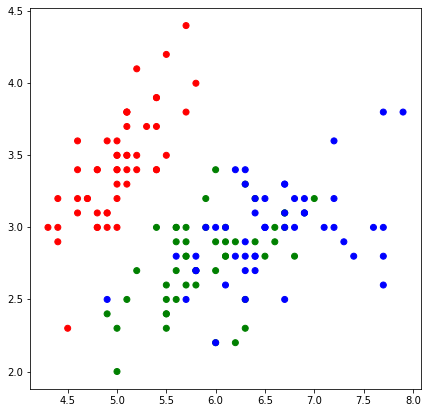

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

In [6]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

Добавим в функцию knn веса от расстояния:

In [7]:

def knn(x_train, y_train, x_test, k, q=0.5):
    
    answers = []

    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
                       
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # отбираем данные по k соседям
        test_distances_k = sorted(test_distances)[0:k]
        
        # рассчитываем общую сумму весов для определения веса каждого соседа
        w_sum = sum([q**test_distances_k[i][0] for i in range(len(test_distances_k))])
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in test_distances_k:
            # рассчитываем показатель для определения веса данного соседа
            w = q**d[0]
            classes[d[1]] += 1*w/w_sum

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

Напишем функцию для вычисления точности

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k

In [9]:
k = 2

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.700


Построим график распределения классов.

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

(2352, 2)


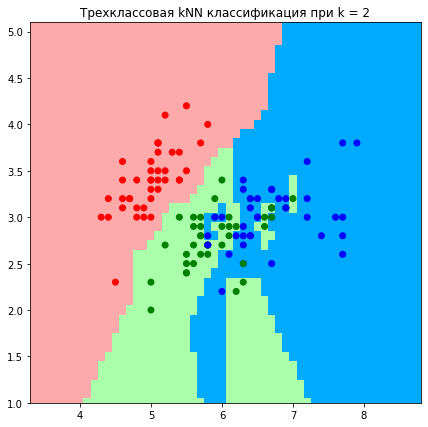

CPU times: user 1.47 s, sys: 2.55 ms, total: 1.48 s
Wall time: 1.48 s


In [11]:
%%time
get_graph(X_train, y_train, k)

In [12]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


(2352, 2)


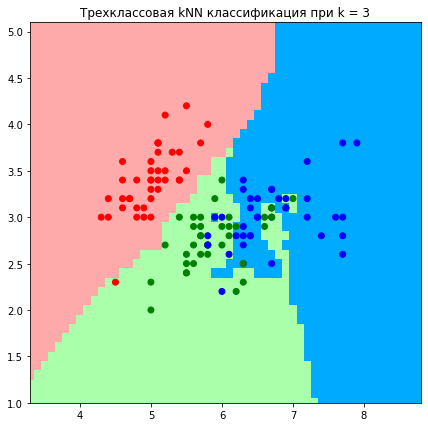

CPU times: user 1.54 s, sys: 0 ns, total: 1.54 s
Wall time: 1.54 s


In [13]:
%%time
get_graph(X_train, y_train, k)

In [14]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


(2352, 2)


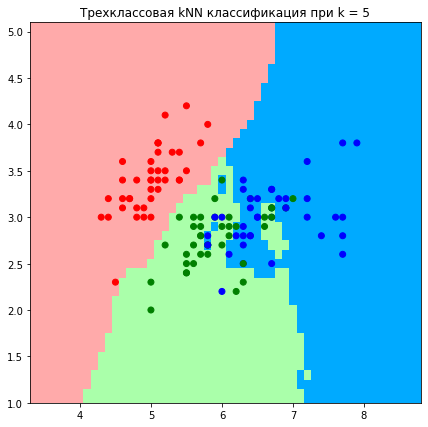

CPU times: user 1.47 s, sys: 0 ns, total: 1.47 s
Wall time: 1.47 s


In [15]:
%%time
get_graph(X_train, y_train, k)

In [16]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.767


(2352, 2)


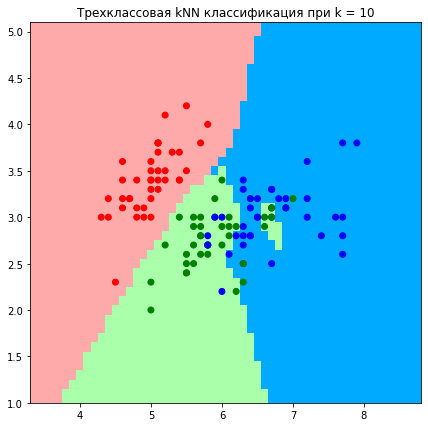

CPU times: user 1.45 s, sys: 0 ns, total: 1.45 s
Wall time: 1.45 s


In [17]:
%%time
get_graph(X_train, y_train, k)

## 2. Напишите функцию по подсчёту метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график её зависимости от k (взять от 1 до 10) для выборки данных из этого урока.

## Обучение без учителя. Кластеризация. K-means<a class='anchor' id='unsupervised'>

In [75]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

In [76]:
import matplotlib.pyplot as plt

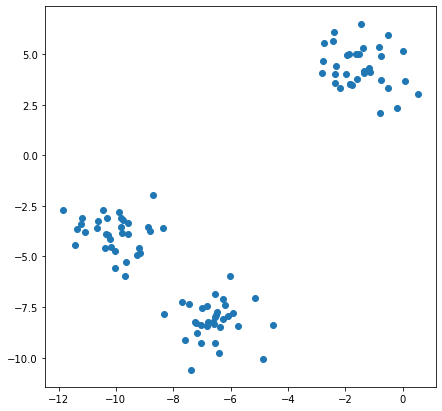

In [77]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1]);

In [78]:
def e_metrics(x1, x2):
    
    distance = np.sum(np.square(x1 - x2))

    return np.sqrt(distance)

In [79]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для кластеризации
    clusters = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # кластеризуем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            cluster = distances.index(min(distances))
            clusters[cluster].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for cluster in clusters:
            centroids[cluster] = np.mean(clusters[cluster], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.linalg.norm(centroids[centroid] - old_centroids[centroid], ord=2) > min_distance:
                optimal = False
                break
        
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, clusters

Напишем функцию для визуализации кластеров

In [80]:
def visualize(centroids, clusters):
    colors = ['r', 'g', 'b', 'orange', 'y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for cluster_item in clusters:
        for x in clusters[cluster_item]:
            plt.scatter(x[0], x[1], color=colors[cluster_item])
            
    plt.show()

In [81]:
# Функция по подсчёту метрики качества кластеризации 
#среднее квадратичное внутрикластерное расстояние
def cluster_mean_sq_metric(centroids, clusters):
    mean_cluster_sq_distances = []
    for key in clusters.keys():
        distances = []
        for el in clusters[key]:
            distance = e_metrics(el, centroids[key])**2
            distances.append(distance)
        mean_cluster_sq_distance = np.mean(distances)
        mean_cluster_sq_distances.append(mean_cluster_sq_distance)
    return np.mean(mean_cluster_sq_distances)   

In [82]:
# определим максимальное количество итераций
max_iterations = 1000

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

# сразу определим известное нам количество кластеров
k = [i for i in range(1,11)]

In [83]:
mean_clusters_sq_distances = []
for el in k:
    centroids, clusters = kmeans(X, el, max_iterations, min_distance)
    mean_cluster_sq_distance = cluster_mean_sq_metric(centroids, clusters)
    mean_clusters_sq_distances.append(mean_cluster_sq_distance)

In [84]:
mean_clusters_sq_distances

[41.1815377770447,
 5.440924547301352,
 1.5895257170712016,
 1.2217447274788882,
 0.9502075696133581,
 0.9512114196907001,
 0.7864329549098462,
 0.7050191955667771,
 0.6598665264642418,
 0.5756599108450361]

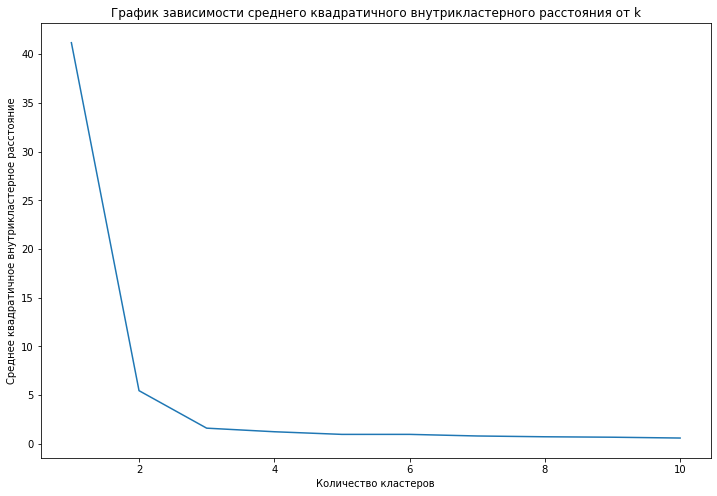

In [85]:
plt.figure(figsize=(12, 8))
plt.plot(k, mean_clusters_sq_distances)
plt.title('График зависимости среднего квадратичного внутрикластерного расстояния от k')
plt.xlabel('Количество кластеров')
plt.ylabel('Cреднее квадратичное внутрикластерное расстояние')
plt.show()

График показывает, что наши данные явно имеют два очень хорошо "разделимых" облака, так как по методу "локтя" при количестве кластеров 2 резко падает среднеквадратическое внутрикластерное расстояние и проявляется "локоть". На 3 кластерах происходит дальнейшее уже более плавное, но ощутимое снижение этого показателя, далее он меняется очень медленно. Целесообразно для целей данной задачи делить данные на 3 кластера.